In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
from scipy.stats.stats import pearsonr

%config InlineBackend.figure_formats=['png']

In [2]:
FIELDS = [
    ("mass_number", "i4"),
    ("protons", "i4"),
    ("name", "a5"),
    ("energy", "f8"),
    ("binding_energy", "f8"),
    ("binding_energy_per_nucleus", "f8"),
]

In [3]:
# Dieses δ arbeitet nicht mit numpy-Arrays zusammen...
def δ(N, Z):
    if N % 2 and Z % 2:
        return -1
    elif not (N % 2 or Z % 2):
        return 1
    return 0

# Dieses schon.
def δ(N, Z):
    return 1 - (N % 2 + Z % 2)

In [4]:
a_V, a_O, a_A, a_C, a_P = 15.84, 18.33, 23.2, 0.714, 11.2

In [5]:
def calculate_binding_energy(Z, N):
    K = Z + N
    return a_V * K - a_O * K**(2/3) - a_A * (N - Z)**2 / K - a_C * Z**2 * K**(-1/3) + δ(N, Z) * a_P * K**(-1/2)

In [6]:
calculate_binding_energy(26, 30)

487.44957320850193

In [7]:
binding_energies = np.loadtxt("binding_energies.txt", dtype=FIELDS)
binding_energies

array([(1, 1, b'1H', 938.272, 0.0, 0.0),
       (2, 1, b'2H', 1875.613, 2.225, 1.112),
       (3, 1, b'3H', 2808.921, 8.482, 2.827), ...,
       (261, 104, b'261Rf', 243168.109, 1923.936, 7.371),
       (264, 108, b'264Hs', 245978.832, 1926.736, 7.298),
       (265, 106, b'265Sg', 246904.568, 1943.152, 7.333)], 
      dtype=[('mass_number', '<i4'), ('protons', '<i4'), ('name', 'S5'), ('energy', '<f8'), ('binding_energy', '<f8'), ('binding_energy_per_nucleus', '<f8')])

In [8]:
binding_energies_calculated = calculate_binding_energy(
    binding_energies["protons"],
    binding_energies["mass_number"] - binding_energies["protons"]
)
differences = binding_energies_calculated - binding_energies["binding_energy"]

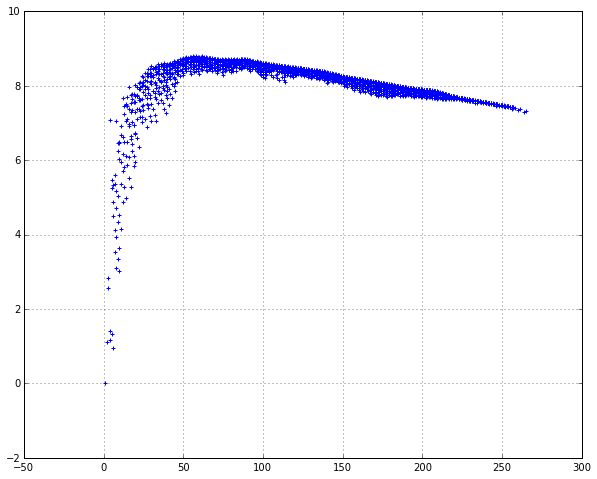

In [9]:
plt.scatter(
    binding_energies["mass_number"],
    binding_energies["binding_energy_per_nucleus"],
    marker="+"
)
plt.grid()

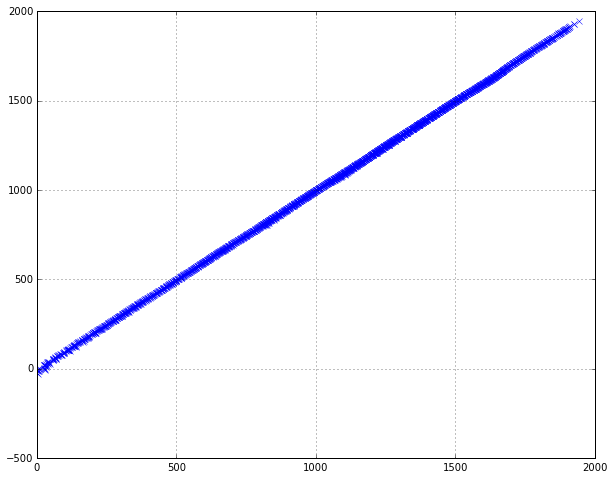

In [10]:
plt.plot(
    binding_energies["binding_energy"],
    binding_energies_calculated,
    "x",
)
plt.grid()

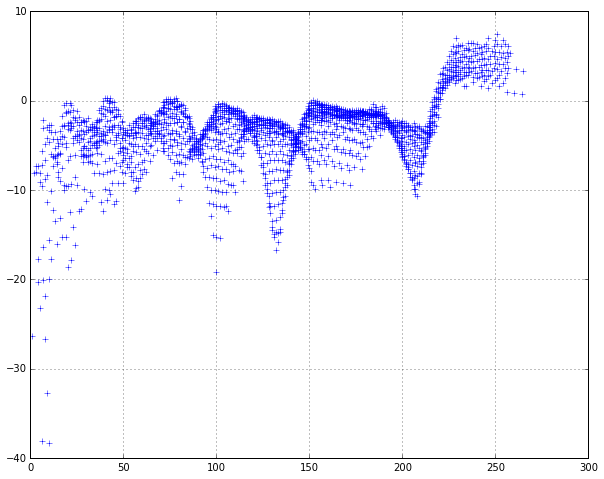

In [11]:
plt.plot(
    binding_energies["mass_number"],
    differences,
    "+"
)
plt.grid()

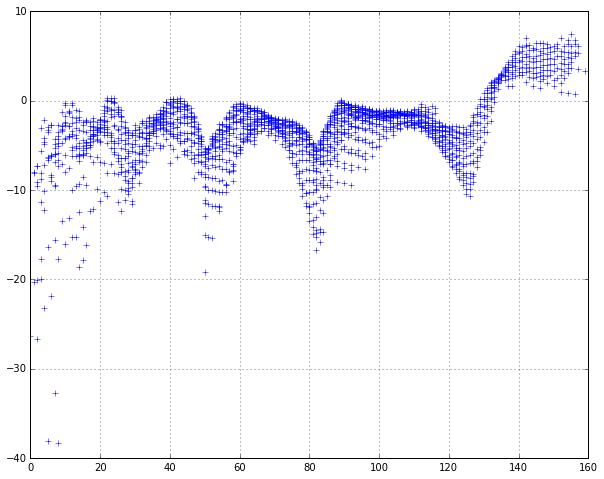

In [12]:
plt.plot(
    binding_energies["mass_number"] - binding_energies["protons"],
    differences,
    "+"
)
plt.grid()

In [13]:
pearsonr(binding_energies["binding_energy"], binding_energies_calculated)

(0.99997496811959052, 0.0)